# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [5]:
df.shape

(21613, 21)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
print('Bedrooms : ',df.bedrooms.unique())
print('Bathrooms: ', df.bathrooms.unique())

Bedrooms :  [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
Bathrooms:  [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


In [8]:
print("Floor       : ", df.floors.unique())
print("Water front : ", df.waterfront.unique())
print("View        : ", df.view.unique())
print("Condition   : ", df.condition.unique())

Floor       :  [1.  2.  1.5 3.  2.5 3.5]
Water front :  [0 1]
View        :  [0 3 4 2 1]
Condition   :  [3 5 4 1 2]


### Dealing with Duplicatec and Null value values

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## EDA Analysis

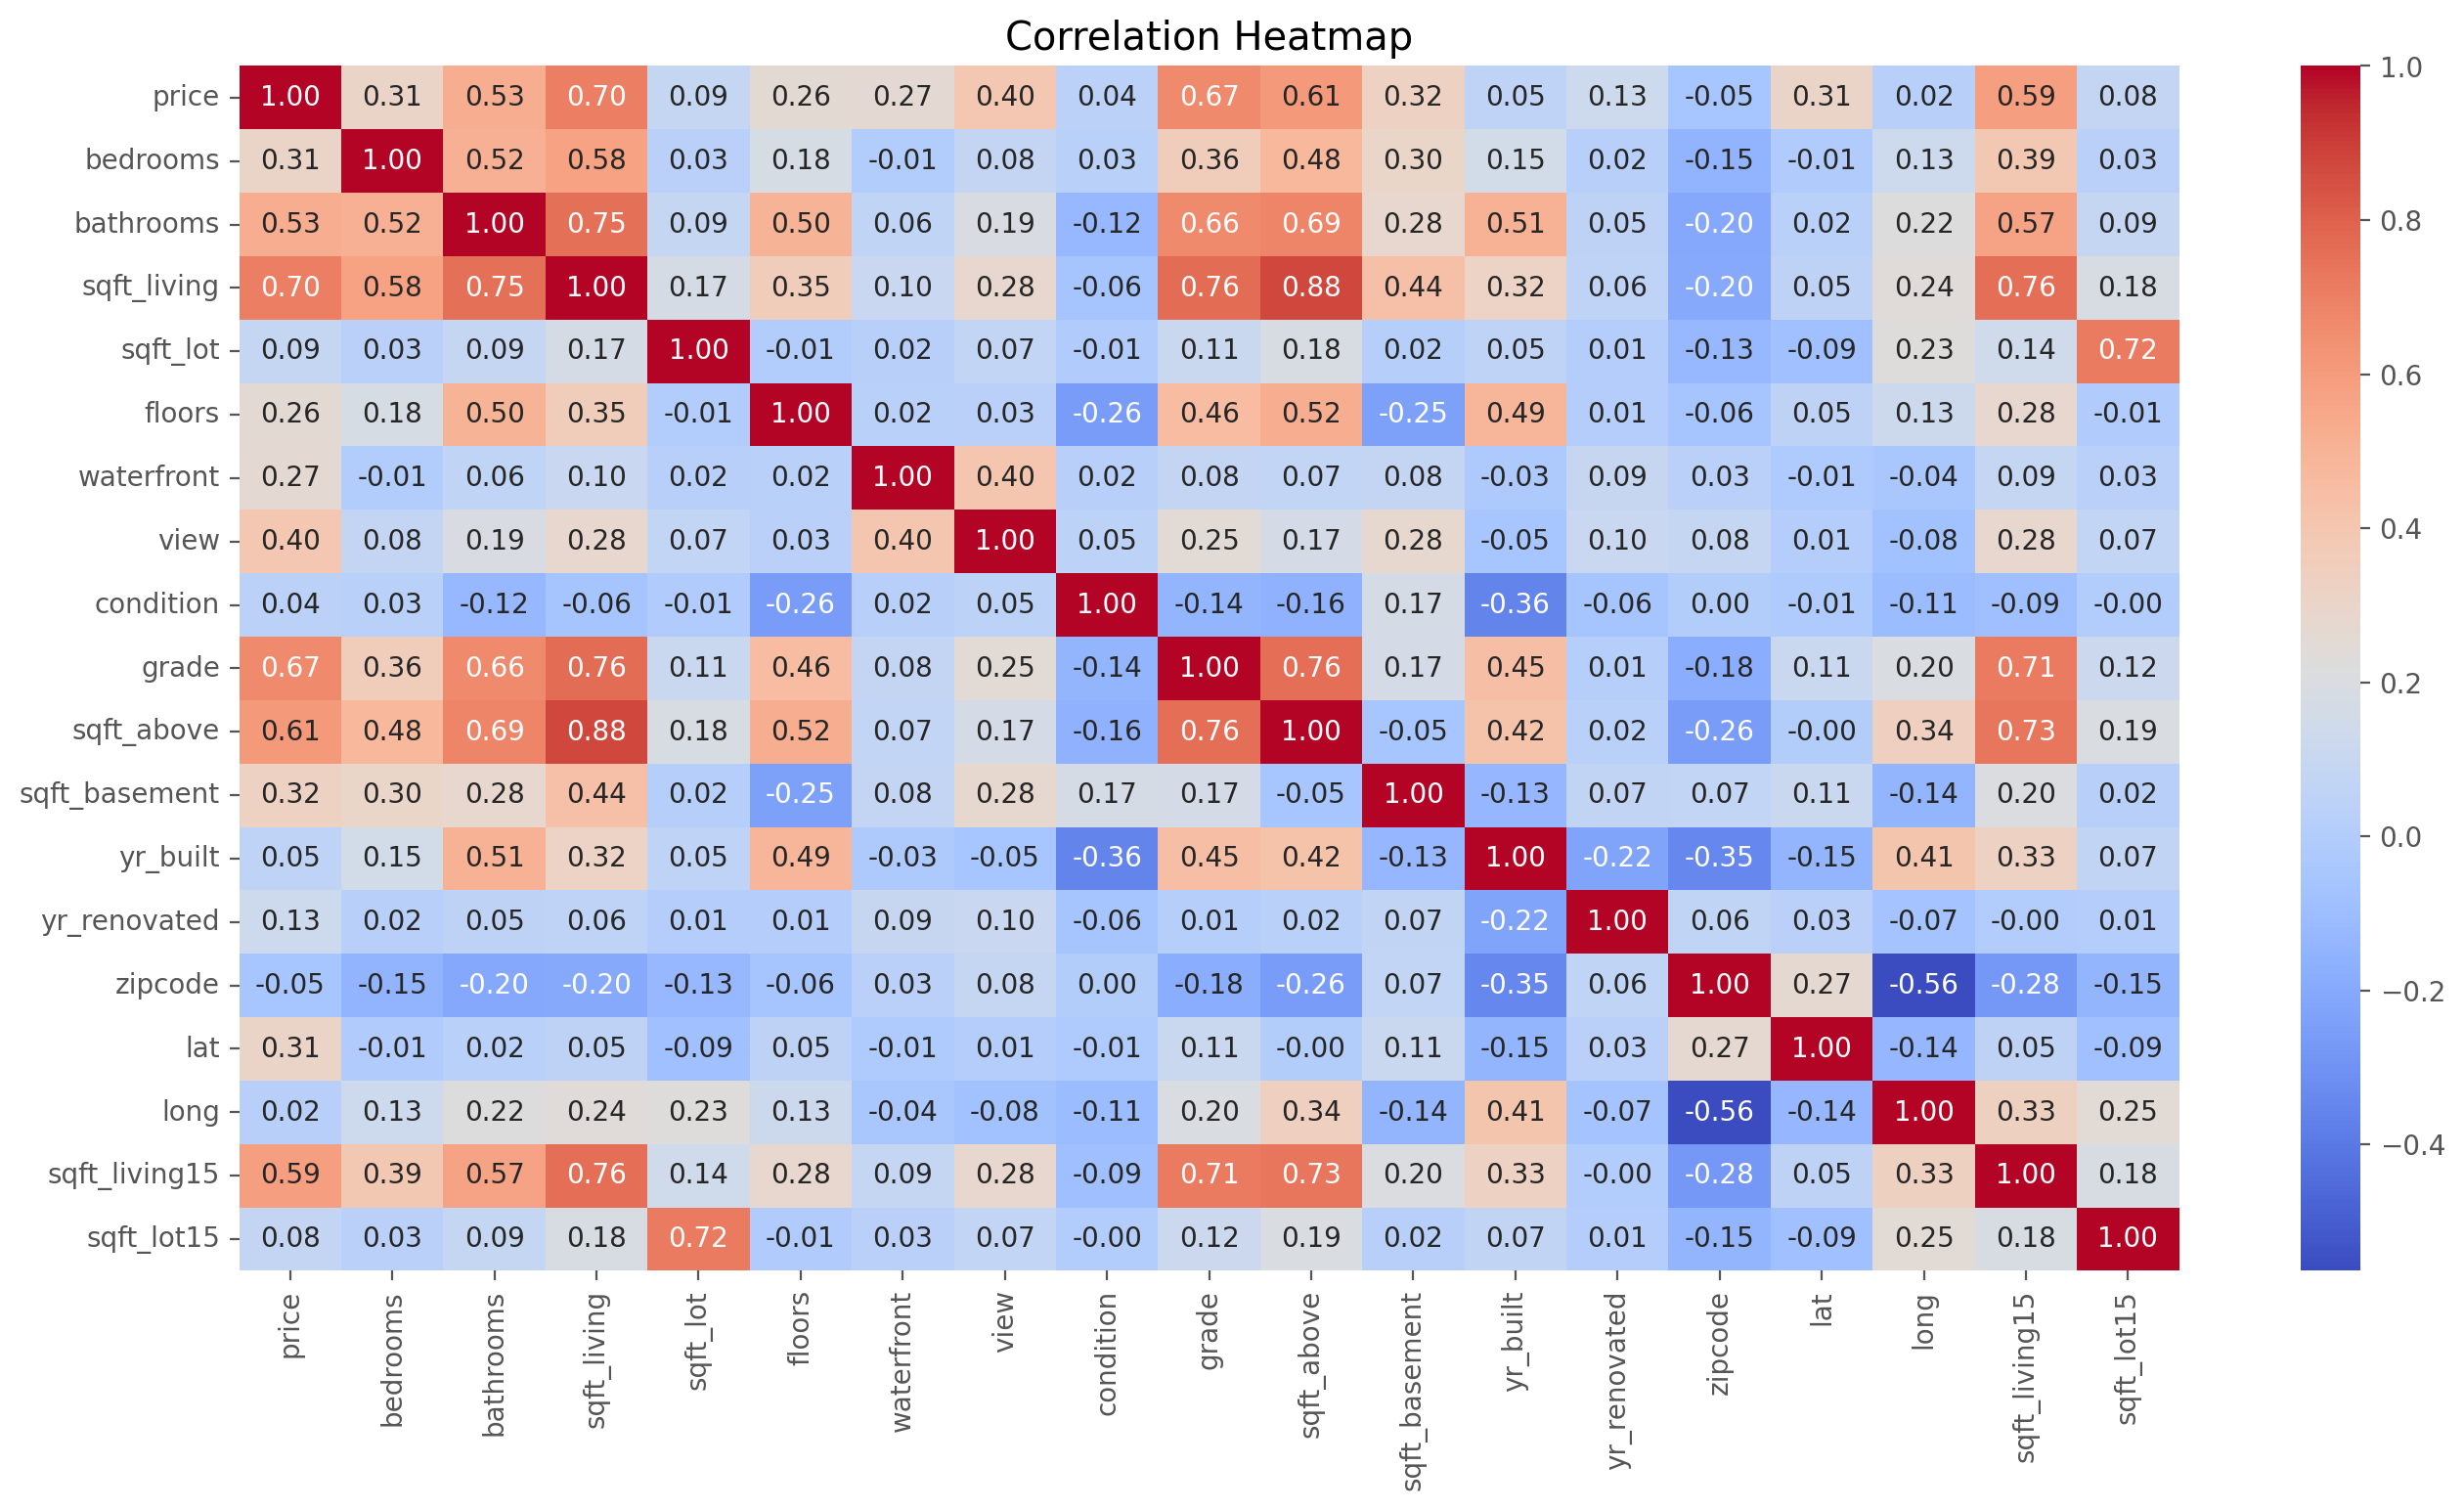

In [12]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
corr_matric = df[cols].corr()

plt.figure(figsize=(16,8),dpi=200)
sns.heatmap(corr_matric, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')

plt.show()

<Axes: xlabel='price', ylabel='Density'>

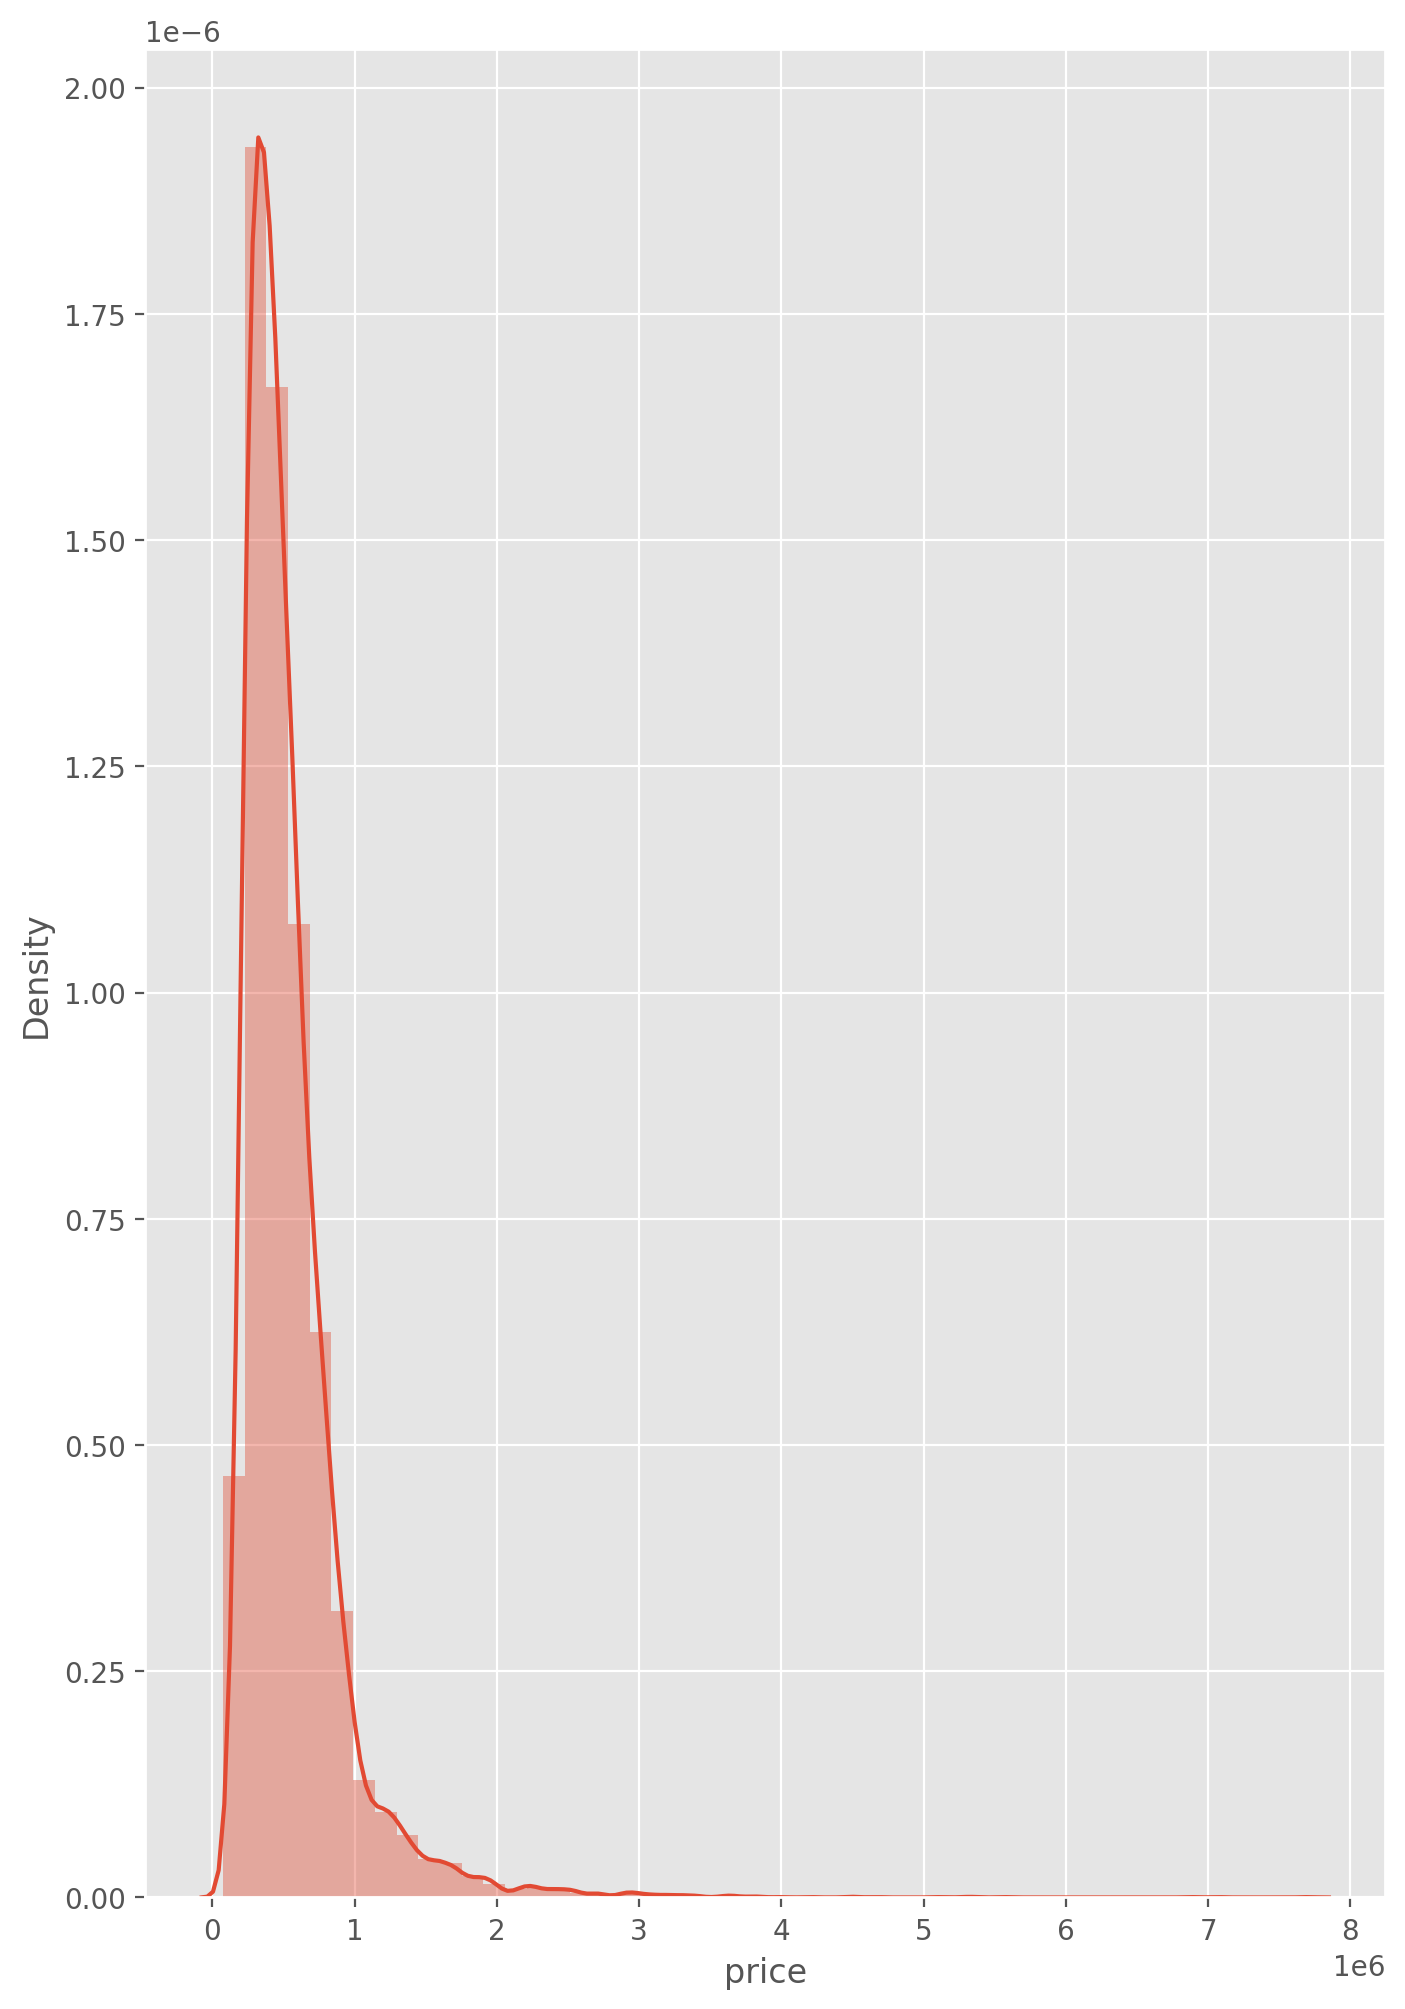

In [13]:
plt.figure(figsize=(8,12), dpi=200)
sns.distplot(df.price)

# Predictive Modelling

In [14]:
cols = ['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat','sqft_living15']
X = df[cols]
Y = df[['price']]
X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800


In [15]:
Y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [16]:
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape       : ', Y.shape)

Independent Feature Set Shape :  (21613, 11)
Dependent Feature Shape       :  (21613, 1)


In [17]:
#Splitting for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [18]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (16209, 11)
Training Labels Shape :  (16209, 1)
Testing Data Shape    :  (5404, 11)
Testing Labels Shape  :  (5404, 1)


In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics


kr_model = KNeighborsRegressor()
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
xb_model = XGBRegressor()

model = [kr_model,lr_model,dt_model,rf_model,xb_model]
evaluation = []


for x in model:
    mod_ev = {}
    x.fit(x_train,y_train)
    
    y_pred_train = x.predict(x_train)
    y_pred_test = x.predict(x_test)
    
    mae_train = metrics.mean_absolute_error(y_train,y_pred_train)
    mae_test = metrics.mean_absolute_error(y_test,y_pred_test)
    mod_ev['MAE Train'] = mae_train
    mod_ev['MAE Test']  = mae_test
    
    rmse_train = (metrics.mean_squared_error(y_train,y_pred_train))**0.5
    rmse_test = (metrics.mean_squared_error(y_test,y_pred_test))**0.5
    mod_ev['RMSE Train'] = rmse_train
    mod_ev['RMSE Test']  = rmse_test
    
    r2_train = metrics.r2_score(y_train,y_pred_train)
    r2_test = metrics.r2_score(y_test,y_pred_test)
    mod_ev['R2 Square Train'] = r2_train
    mod_ev['R2 Square Test']  = r2_test
    
    evaluation.append(mod_ev)
    


### Evaluation and Model Selection

In [24]:
columns = ['Linear Regression','Lasso Regression','Decision Tree Regressor','Random Forest Regressor','XGBoost Regressor']
df_ev = pd.DataFrame(evaluation, index = columns)
df_ev.index.name = 'Model Name'
df_ev

,MAE Train,MAE Test,RMSE Train,RMSE Test,R2 Square Train,R2 Square Test
Model Name,,,,,,
Linear Regression,136347.093059,171950.358364,207267.283585,270166.256858,0.669059,0.512060
Lasso Regression,133755.343460,136897.355373,211569.741239,224297.178567,0.655177,0.663681
Decision Tree Regressor,952.224032,127631.371021,9615.170625,249074.523687,0.999288,0.585272
Random Forest Regressor,32742.603192,91669.150694,58357.947855,177755.559060,0.973764,0.788772
XGBoost Regressor,58002.677235,94183.642869,83883.290530,189282.085477,0.945795,0.760490


<Axes: title={'center': 'Result Analysis'}, xlabel='Model Name'>

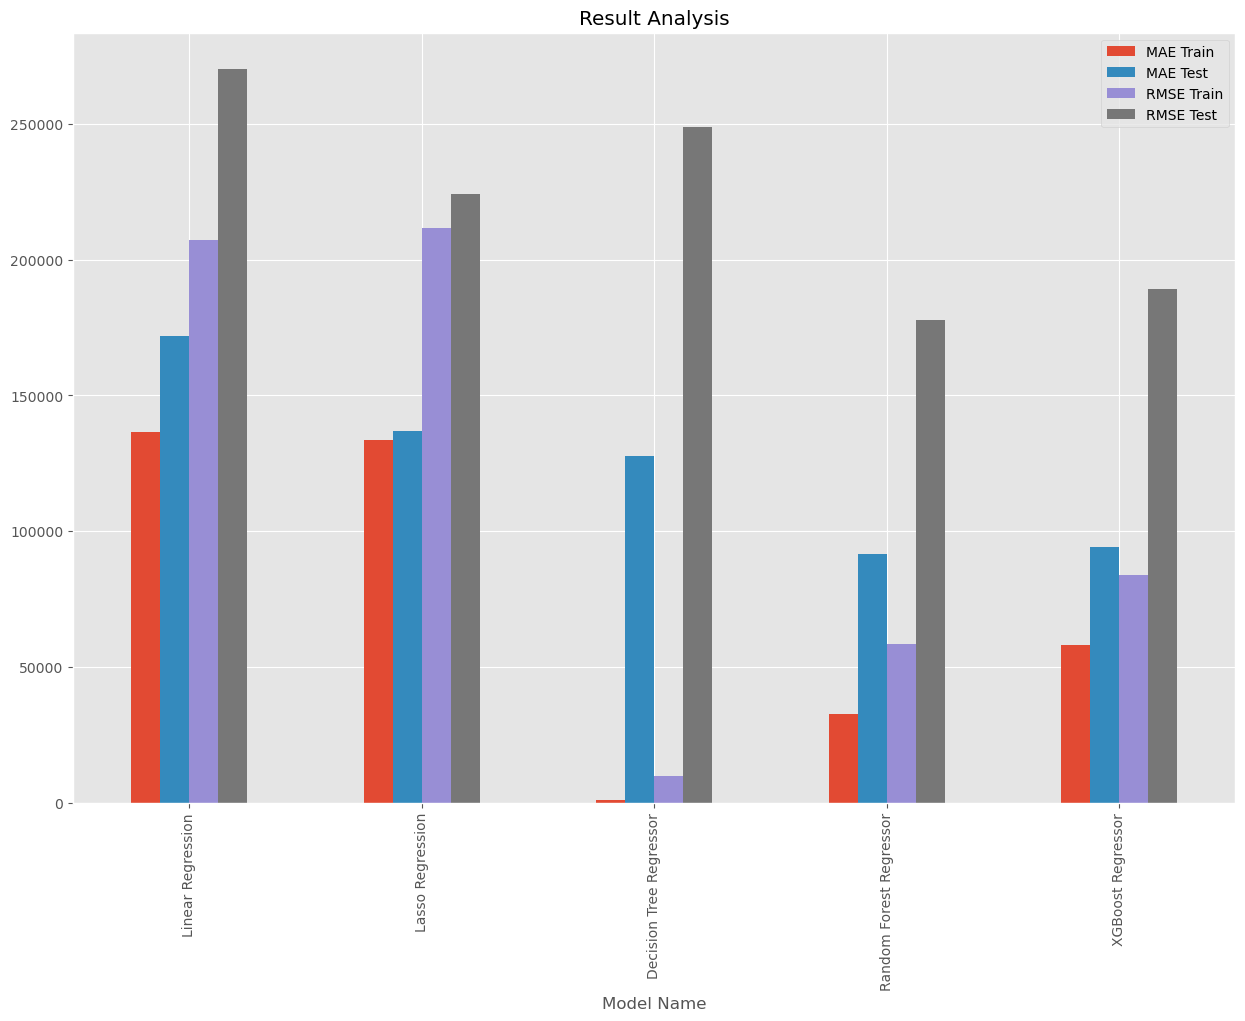

In [25]:
df_ev[['MAE Train', 'MAE Test', 'RMSE Train', 'RMSE Test']].plot(kind='bar', title='Result Analysis', figsize=(15, 10))

<Axes: title={'center': 'Result Analysis'}, xlabel='Model Name'>

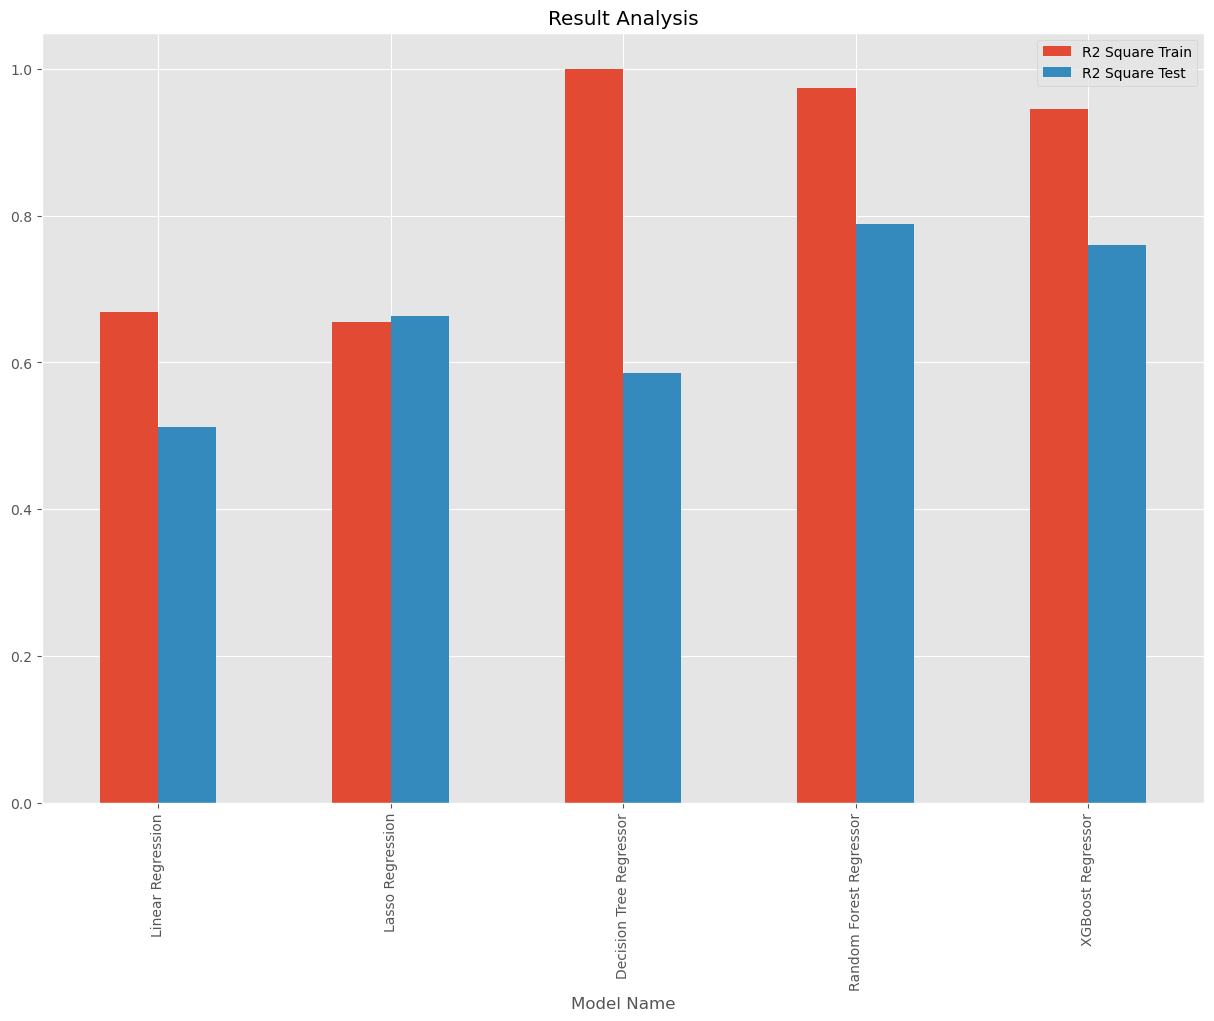

In [29]:
df_ev[['R2 Square Train','R2 Square Test']].plot(kind='bar', title='Result Analysis', figsize=(15, 10))

**Project Summary:**

**Objective:** The aim of this project was to develop a predictive model for house prices based on a set of independent variables.

**Key Steps:**

1. **Data Preprocessing:**
   - The dataset comprised 21 columns and 21,613 rows, featuring a mix of integer, float, and object data types.
   - Initial data checks were conducted to identify and address any duplicate or missing values, ensuring data cleanliness and integrity.
   - Preprocessing involved preparing the data for analysis, including encoding categorical variables and handling outliers.

2. **Exploratory Data Analysis (EDA):**
   - EDA was performed to gain insights into the relationships between the independent variables and the target variable (house prices).
   - Visualizations such as heatmaps and distribution plots were utilized to understand the distribution and correlation of features.
   - Feature extraction techniques were applied based on correlation analysis to select relevant features for modeling.

3. **Model Training:**
   - Multiple regression models were trained, including Linear Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, and XGBoost Regressor.
   - Hyperparameter tuning was performed using GridSearchCV to optimize model performance.
   - Model performance was evaluated using standard regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 score.

4. **Model Evaluation:**
   - Evaluation metrics were stored in a structured format for comparison across models.
   - The Random Forest Regressor emerged as the top-performing model due to its lower error metrics compared to other models.

**Conclusion:**
   - The project successfully developed a predictive model for house prices, with the Random Forest Regressor identified as the most effective model based on performance metrics.
   - By following a systematic workflow from data preprocessing through model training and evaluation, valuable insights were obtained, facilitating informed decision-making in the domain of house price prediction.